In [13]:
%reload_ext autoreload
%autoreload 2
from brian2 import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import power_spectral_density as psd
import experiment_10_full_ping_connectome as ex10
#from IPython.display import Image


In [141]:
plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize=18)
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
plt.rc('lines', linewidth=3)
plt.rc('legend', fontsize=14)

In [133]:
def plot_ma(n, x, dt, shift, ax=None, color=None, label=None):
    #dt, shift = 50, 10
    start = 1000
    end = max(start, max(x))
    ma, t = psd.moving_average(x, dt, shift, start, end)
    ma = 100.0 * ma / n
    if not ax:
        _, ax = plt.subplots()
        
    #ax.set_xlabel('Time (ms)', fontsize=18)
    ax.set_ylabel('Firing rate\n (% neurons/ms)')
    ax.plot(t, ma, color=color, label=label)
    
def plot_spectrum(x, dt, shift, ax=None, color=None, label=None):
    #dt, shift = 75, 10
    if not ax:
        _, ax = plt.subplots()
        
    start, end = 1000, max(x)
    f, pxx = psd.power_spectrum(x, dt, shift, start, end)
    ax.semilogy(f, pxx, color=color, label=label)
    ax.set_xlabel('Frequency (Hz)')
    ax.set_ylabel('Power')
    

In [168]:
def plot_stuff(data, start=1000, end=2000, save=None):
#    N, N_EX, N_IN = 50, 40, 10
    #N, N_EX, N_IN = 100, 80, 20
    n_ex, n_in, n_mod, n_ex_mod, n_in_mod, X, Y, X2, Y2 = [
        data[k]
        for k
        in ['n_ex', 'n_in', 'n_mod', 'n_ex_mod', 'n_in_mod', 'X', 'Y', 'X2', 'Y2']
    ]
    
    n_ex = n_ex_mod * min(n_mod, 10)
    n_in = n_in_mod * min(n_mod, 10)
    start_time = start
    end_time = end
    
    #mask1 = np.logical_and(X >= start_time, X < end_time)
    #mask2 = np.logical_and(X2 >= start_time, X2 < end_time)
    
    print("{:,} exc spikes, {:,} inh spikes".format(len(X), len(X2)))
    
    mask = np.logical_and.reduce((X >= start_time, X < end_time, Y < n_ex))
    mask2 = np.logical_and.reduce((X2 >= start_time, X2 < end_time, Y2 < n_in))
    
    fig, axarr = plt.subplots(3, figsize=(15,15))
    axarr[0].plot(X[mask], Y[mask], '.', color='C0', label='Excitatory Population')
    axarr[0].plot(X2[mask2], Y2[mask2]+n_ex, '.', color='C1', label='Inhibitory Population')
    axarr[0].set_ylabel('Neuron index')
    axarr[0].set_xlabel('Simulation Time (ms)')
    axarr[0].set_title('Raster plot of spikes')
    axarr[0].set_xlim([start_time, end_time])
    #axarr[0].legend(loc=3)
    
    dt, shift = 5, 5
    plot_ma(n_ex, X[mask], dt, shift, ax=axarr[1] , label='Excitatory Population')
    plot_ma(n_in, X2[mask2], dt, shift, ax=axarr[1], label='Inhibitory Population')
    axarr[1].set_xlabel('Simulation Time (ms)')
    axarr[1].set_xlim([start_time, end_time])
    axarr[1].legend()
    
    #fig, axarr = plt.subplots(2, sharex=True, figsize=(15,6))
    plot_spectrum(X, dt, shift, ax=axarr[2], label='Excitatory Population')
    plot_spectrum(X2, dt, shift, ax=axarr[2], label='Inhibitory Population')
    axarr[2].set_xticks(np.arange(0, (1000.0/shift)/2.0 + 1, 10))
    axarr[2].legend()
    
    plt.tight_layout()
    if save:
        plt.savefig(save)
    plt.show()



In [166]:
data = ex10.run_experiment(n_mod=2, duration=5000)

Setting up synapses... 
	EX_IN_SYN... (556 synapses) [0.02s]
	IN_EX_SYN... (800 synapses) [0.02s]
	IN_IN_SYN... (200 synapses) [0.02s]
All synapses created [0.09s]
Supplying Poisson input to network...  [0.01s]
Running sym...  [6.93s]


19,146 exc spikes, 15,650 inh spikes


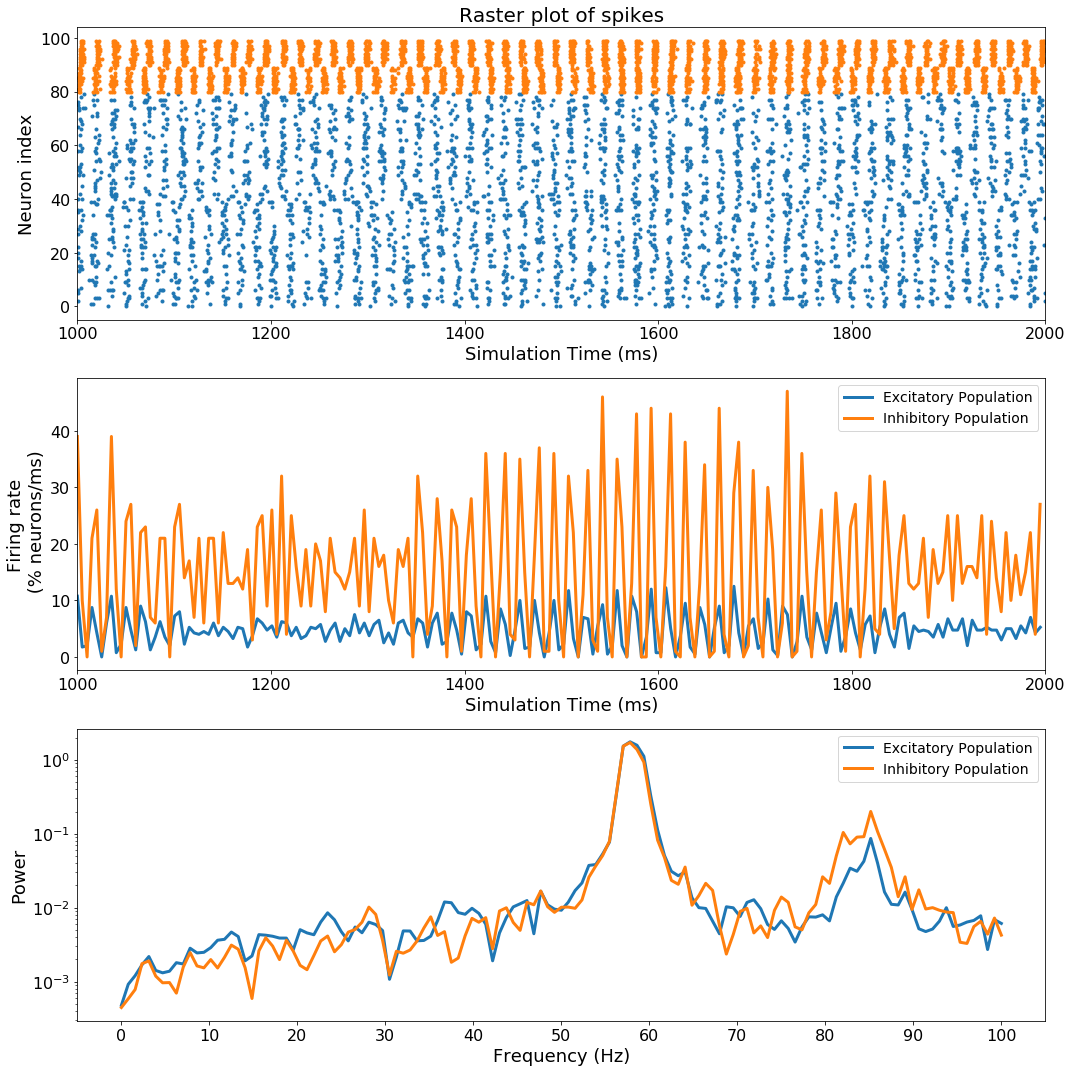

In [169]:
plot_stuff(data)

In [120]:
X, Y, n_mod = [data[k] for k in ['X', 'Y', 'n_mod']]

In [ ]:

print("{:,} spikes".format(len(X)))
N = 40 * n_mod
dt, shift = 5, 5 
plot_ma(N, X, dt, shift)
plot_spectrum(X, dt, shift)
plt.show()
#mask = np.logical_and(Y < 200, X > 95)
mask = Y < 400
plt.plot(X[mask], Y[mask], '.')
plt.show()